In [554]:
import cv2
import os
import hdbscan
import pandas as pd
import numpy as np
import seaborn as sns
import open3d as o3d
from matplotlib import pyplot as plt
from open3d.web_visualizer import draw
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
current_palette = sns.color_palette('bright',10)

from utilities.dataset import ContactPose
import utilities.misc as mutils

In [19]:
intent = "use"
subj_id = "28"
obj_class = "apple"

In [20]:
pcd = o3d.io.read_point_cloud("./data/contactpose_data/full"+subj_id+"_use/"+obj_class+"/" + obj_class+".ply") # Read the point cloud
cp = ContactPose(int(subj_id), intent, obj_class)

MANO code was not detected, please follow steps in README.md. mano_meshes() will return (None, None)


In [21]:
object_points = np.asarray(pcd.points) 
object_sample_id = np.random.choice(object_points.shape[0], 2048, replace=False)
object_points = object_points[object_sample_id]

In [22]:
left_hand_joint = cp.hand_joints()[0]
right_hand_joint = cp.hand_joints()[1]

In [23]:
len(object_points)

2048

In [ ]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.15,0.15)
ax.set_ylim(-0.15,0.15)
ax.set_zlim(-0.15,0.15)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(object_points[:,0], object_points[:,1], object_points[:,2],marker='.', s=200, label='Object')

if left_hand_joint != None:
    ax.scatter(left_hand_joint[:,0], left_hand_joint[:,1], left_hand_joint[:,2],marker='.', s=100, label='Left Hand')
    ax.plot(left_hand_joint[:5][:,0], left_hand_joint[:5][:,1], left_hand_joint[:5][:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,0],np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,1] , np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,2], linewidth=3, color='r')

ax.scatter(right_hand_joint[:,0], right_hand_joint[:,1], right_hand_joint[:,2],marker='.', s=100,  label='Right Hand')
ax.plot(right_hand_joint[:5][:,0], right_hand_joint[:5][:,1], right_hand_joint[:5][:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,0],np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,1] , np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,2], linewidth=3, color='g')

    
ax.set_title('Predicted Result')
ax.legend()
plt.show()

In [550]:
obj_class_all = ["apple", "banana", "binoculars", "bowl", "camera", "cell_phone", "cup", "door_knob", "eyeglasses", "flashlight",
                "hammer", "headphones", "knife", "light_bulb", "mouse", "mug", "pan", "ps_controller", "scissors", "stapler",
                "toothbrush", "toothpaste", "utah_teapot", "water_bottle", "wine_glass",]

# "hands", "palm_print"

In [551]:
len(obj_class_all)

25

In [552]:
root = "./data/contactpose_data/"
right_count = []
for obj in obj_class_all:
    count = 0
    for folder in os.listdir(root):
        if "use" in folder:
            if obj in os.listdir(root + folder):
                subj_id = folder.split("_")[0][4:]
                cp = ContactPose(int(subj_id), "use", obj,load_mano=False)    
                if cp.hand_joints()[1] is not None:              
                    count = count + 1
    right_count.append(count)
    print(obj + ":" + str(count) + " samples")

apple:41 samples
banana:38 samples
binoculars:46 samples
bowl:44 samples
camera:49 samples
cell_phone:42 samples
cup:43 samples
door_knob:42 samples
eyeglasses:46 samples
flashlight:47 samples
hammer:46 samples
headphones:45 samples
knife:46 samples
light_bulb:43 samples
mouse:46 samples
mug:44 samples
pan:44 samples
ps_controller:47 samples
scissors:43 samples
stapler:41 samples
toothbrush:46 samples
toothpaste:43 samples
utah_teapot:42 samples
water_bottle:48 samples
wine_glass:46 samples


In [558]:
d = {'object type': obj_class_all, '# of rhand samples': right_count}
df = pd.DataFrame(data=d)
df

,object type,# of rhand samples
0,apple,41
1,banana,38
2,binoculars,46
3,bowl,44
4,camera,49
5,cell_phone,42
6,cup,43
7,door_knob,42
8,eyeglasses,46
9,flashlight,47


In [560]:
# for obj in obj_class_all:
obj_class ="hammer"
intent = "use"

left_joint_all = []
right_joint_all = []

# for folder in os.listdir(root):
#     if "use" in folder:
for subj_id in range(1, 51):
    if obj_class not in os.listdir(root + "full" + str(subj_id) + "_" + intent):
        left_joint_all.append([])
        right_joint_all.append([])
    else:
        cp = ContactPose(subj_id, intent, obj_class, obj,load_mano=False)
        if cp.hand_joints()[0] is not None:
            left_joint_all.append(cp.hand_joints()[0])
        else:
            left_joint_all.append([])
            
        if cp.hand_joints()[1] is not None:
            right_joint_all.append(cp.hand_joints()[1])
        else:
            right_joint_all.append([])

In [525]:
len(right_joint_all)

50

In [526]:
right_hand_flat = [i.flatten() for i in right_joint_all if i != []]

/tmp/ipykernel_1550/2799958020.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  right_hand_flat = [i.flatten() for i in right_joint_all if i != []]


In [527]:
len(right_hand_flat)

46

In [528]:
right_hand_flat_index = [i for i in range(len(right_joint_all)) if right_joint_all[i] != []]

/tmp/ipykernel_1550/3531535293.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  right_hand_flat_index = [i for i in range(len(right_joint_all)) if right_joint_all[i] != []]


In [529]:
# clusterer = hdbscan.HDBSCAN(metric='l2')
clusterer = KMeans(n_clusters=2, random_state=0).fit(right_hand_flat)

In [530]:
# clusterer.fit(right_hand_flat)

In [531]:
clusterer.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [535]:
cluster_1_index = [i for i in range(len(clusterer.labels_)) if clusterer.labels_[i] == 0]

In [536]:
len(cluster_1_index)

2

MANO code was not detected, please follow steps in README.md. mano_meshes() will return (None, None)
MANO code was not detected, please follow steps in README.md. mano_meshes() will return (None, None)


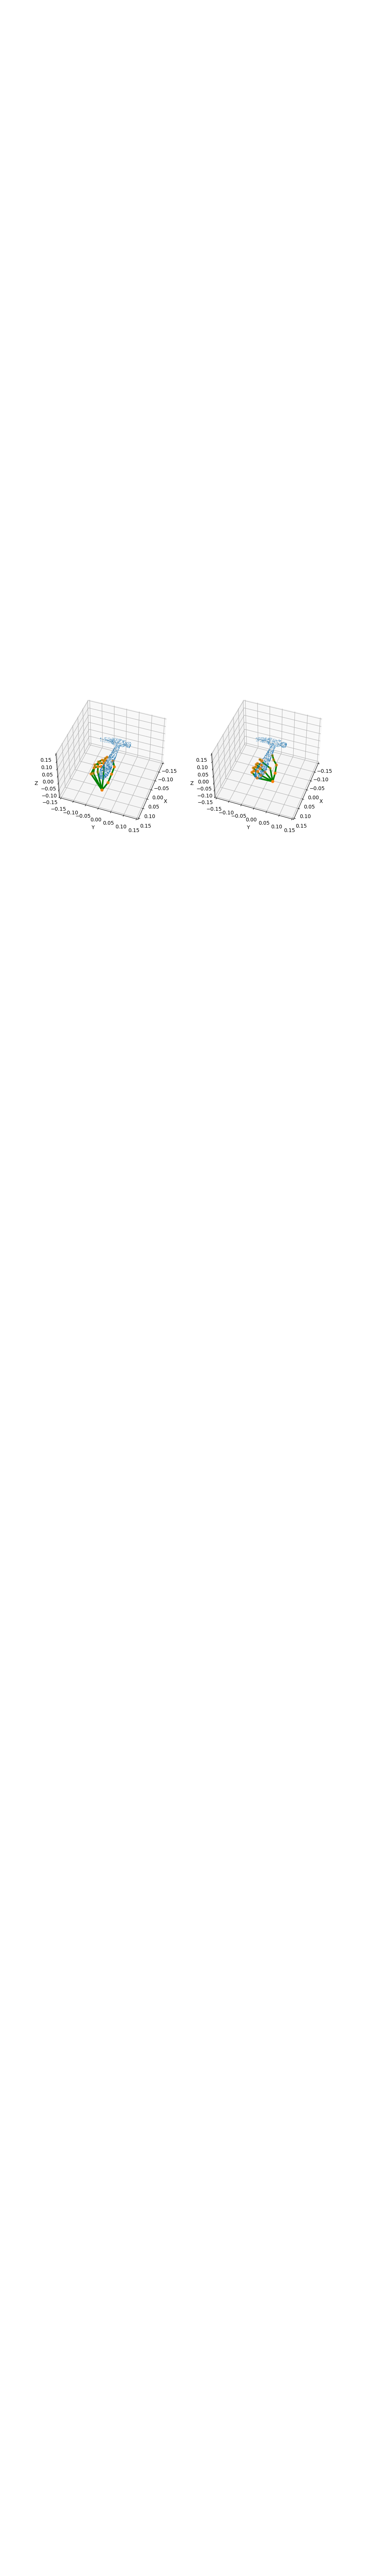

In [537]:
# fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

# # axs = axs.ravel()

# axes = [fig.add_subplot(1, 4, i+1, projection='3d') for i in range(len(angles))]

fig = plt.figure(figsize=(10,70))
for i in range(len(cluster_1_index)):
    
    # intent = "use"
    subj_id = str(right_hand_flat_index[cluster_1_index[i]]+1)
    # obj_class = "apple"

    pcd = o3d.io.read_point_cloud("./data/contactpose_data/full"+subj_id+"_use/"+obj_class+"/" + obj_class+".ply") # Read the point cloud
    cp = ContactPose(int(subj_id), intent, obj_class)

    object_points = np.asarray(pcd.points) 
    object_sample_id = np.random.choice(object_points.shape[0], 1024, replace=False)
    object_points = object_points[object_sample_id]
    right_hand_joint = cp.hand_joints()[1]
    

    ax = fig.add_subplot(int(len(cluster_1_index)/2+1),2,i+1,projection='3d')
    ax.set_xlim(-0.15,0.15)
    ax.set_ylim(-0.15,0.15)
    ax.set_zlim(-0.15,0.15)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.scatter(object_points[:,0], object_points[:,1], object_points[:,2],marker='.', s=1, label='Object')

    ax.scatter(right_hand_joint[:,0], right_hand_joint[:,1], right_hand_joint[:,2],marker='.', s=100,  label='Right Hand')
    ax.plot(right_hand_joint[:5][:,0], right_hand_joint[:5][:,1], right_hand_joint[:5][:,2], linewidth=3, color='g')
    ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,2], linewidth=3, color='g')
    ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,2], linewidth=3, color='g')
    ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,0],np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,2], linewidth=3, color='g')
    ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,1] , np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,2], linewidth=3, color='g')
    
    ax.view_init(45, 20, 0)
    
plt.show()
